<a href="https://colab.research.google.com/github/yurenianastya/cats-n-dogs-classification/blob/master/Cats_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h4>Cats/Dogs classification</h4>Importing libarires for cats and dogs classification

In [0]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt


Uploading data

In [0]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

Writing file paths for training and validation sets

In [0]:
train_directory = os.path.join(PATH, 'train')
validation_directory = os.path.join(PATH, 'validation')

train_cats = os.path.join(train_directory, 'cats')
train_dogs = os.path.join(train_directory, 'dogs')
validation_cats = os.path.join(validation_directory, 'cats')
validation_dogs = os.path.join(validation_directory, 'dogs')

Observing data (just for better understanding)

In [0]:
cats_num_training = len(os.listdir(train_cats))
dogs_num_training = len(os.listdir(train_dogs))

cats_num_validation = len(os.listdir(validation_cats))
dogs_num_validation = len(os.listdir(validation_dogs))

total_train = cats_num_training + dogs_num_training
total_val = cats_num_validation + dogs_num_validation

print("Total imgs for training: ", total_train)
print("--")
print("Total imgs for validation: ", total_val)

Total imgs for training:  2000
--
Total imgs for validation:  1000


Setting variables

In [0]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

Preprocessing our images into proper tensors and set up generators that convert these images into batches of tensors with keras

In [0]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [0]:
train_data_generation = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                                  directory=train_directory,
                                                                  shuffle=True,
                                                                  target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                                  class_mode='binary')
validation_data_generation = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_directory,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Visualize images

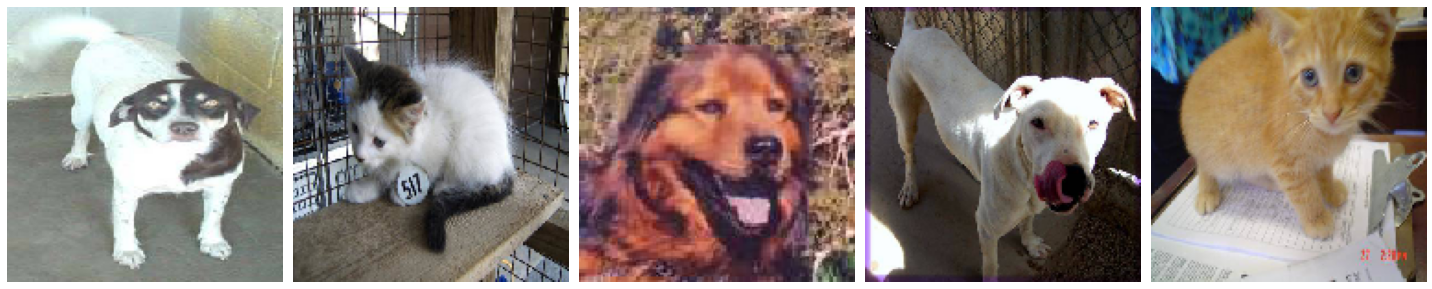

In [0]:
sample_training_images, _ = next(train_data_generation) # The next function returns a batch from the dataset
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

plotImages(sample_training_images[5:10])

Creating a model

In [0]:
my_model = Sequential([
                       Conv2D(16,3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
                       MaxPooling2D(),
                       Conv2D(32,3, padding='same', activation='relu'),
                       MaxPooling2D(),
                       Conv2D(64,3, padding='same', activation='relu'),
                       MaxPooling2D(),
                       Flatten(),
                       Dense(512, activation='relu'),
                       Dense(1)
])
my_model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                 metrics=['accuracy'])
my_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 18, 18, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 20736)            

Training the model

In [0]:
history = my_model.fit_generator(
    train_data_generation,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=validation_data_generation,
    validation_steps=total_val // batch_size
)

Epoch 1/10
15/15 [==============================] - 48s 3s/step - loss: 0.6856 - accuracy: 0.4925 - val_loss: 0.6678 - val_accuracy: 0.5000
Epoch 2/10
15/15 [==============================] - 48s 3s/step - loss: 0.6366 - accuracy: 0.5828 - val_loss: 0.6564 - val_accuracy: 0.5446
Epoch 3/10
15/15 [==============================] - 48s 3s/step - loss: 0.5766 - accuracy: 0.6725 - val_loss: 0.5685 - val_accuracy: 0.6953
Epoch 4/10
15/15 [==============================] - 48s 3s/step - loss: 0.5289 - accuracy: 0.7324 - val_loss: 0.6000 - val_accuracy: 0.7042
Epoch 5/10
15/15 [==============================] - 48s 3s/step - loss: 0.4843 - accuracy: 0.7628 - val_loss: 0.5554 - val_accuracy: 0.7121
Epoch 6/10
15/15 [==============================] - 50s 3s/step - loss: 0.4531 - accuracy: 0.7651 - val_loss: 0.5948 - val_accuracy: 0.6719
Epoch 7/10
15/15 [==============================] - 50s 3s/step - loss: 0.4181 - accuracy: 0.7991 - val_loss: 0.5524 - val_accuracy: 0.7087
Epoch 8/10
15/15 [==

Visualization of training


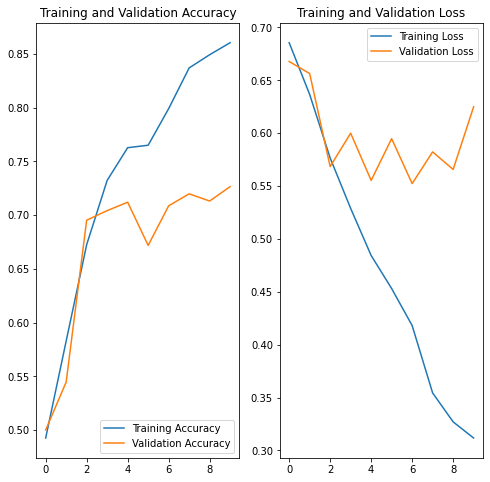

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Applying data augmentation (flip, zoom, etc)

In [0]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_directory,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 2000 images belonging to 2 classes.


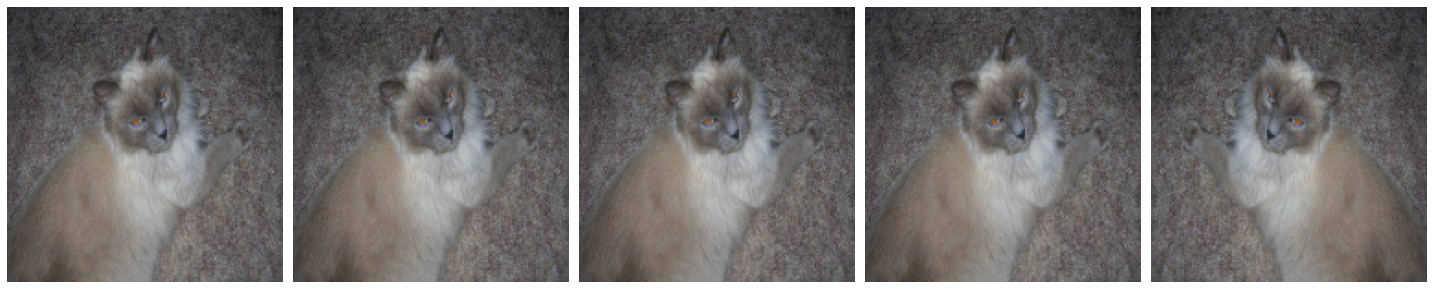

In [0]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
# Re-use the same custom plotting function defined and used
# above to visualize the training images
plotImages(augmented_images)

Randomly image rotation

Found 2000 images belonging to 2 classes.


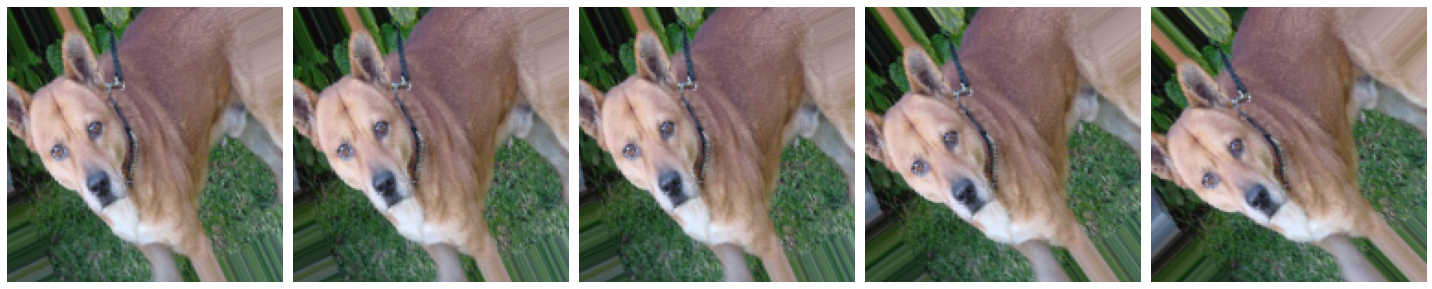

In [0]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_directory,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

Zoom augmentation

Found 2000 images belonging to 2 classes.


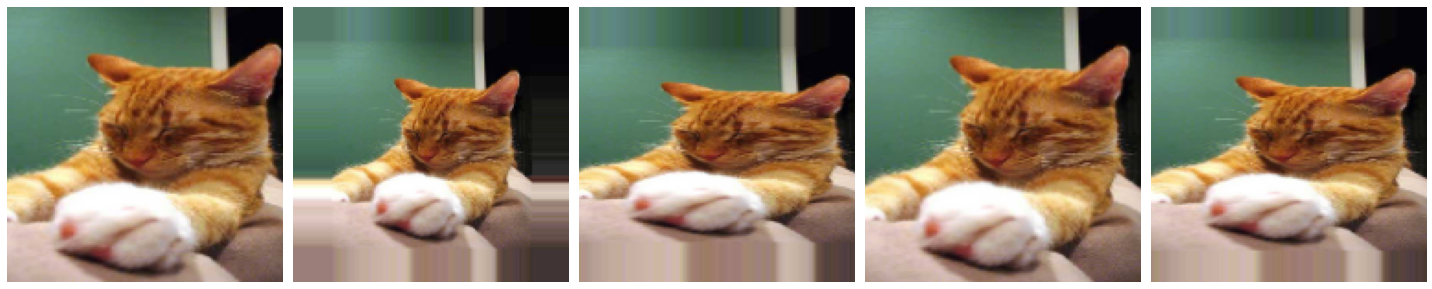

In [0]:
# zoom_range from 0 - 1 where 1 = 100%.
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5) # 

train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_directory,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

Putting all augmentation methods together

Found 2000 images belonging to 2 classes.


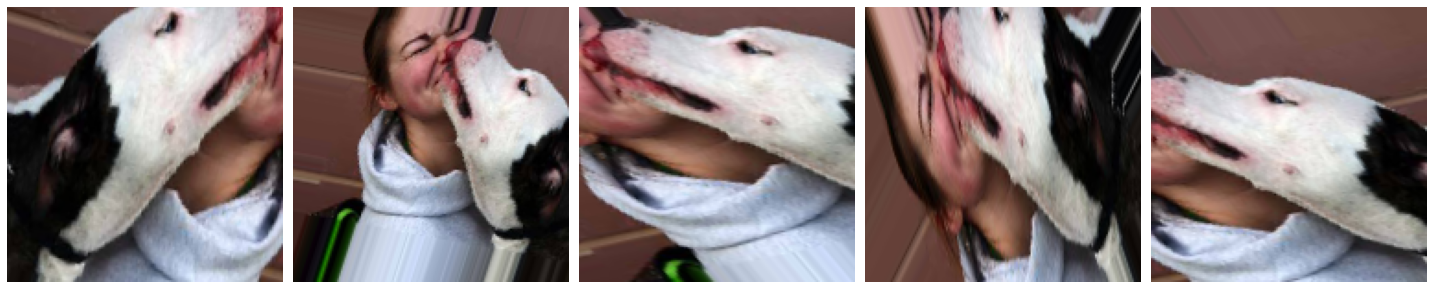

In [0]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )

train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_directory,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)


Creating validation data generator

In [0]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_directory,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


Applying dropout to model (regularization form, which shrinks weight's values changes)

In [0]:
my_model_new = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', 
           input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

my_model_new.compile(optimizer='adam',
                  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  metrics=['accuracy'])

my_model_new.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 75, 75, 16)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 18, 18, 64)       

Re-training the model

In [67]:
history = my_model_new.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/15
15/15 [==============================] - 58s 4s/step - loss: 0.6162 - accuracy: 0.6458 - val_loss: 0.6211 - val_accuracy: 0.5993
Epoch 2/15
15/15 [==============================] - 58s 4s/step - loss: 0.5947 - accuracy: 0.6688 - val_loss: 0.6109 - val_accuracy: 0.6027
Epoch 3/15
15/15 [==============================] - 58s 4s/step - loss: 0.6080 - accuracy: 0.6384 - val_loss: 0.5917 - val_accuracy: 0.6172
Epoch 4/15
15/15 [==============================] - 58s 4s/step - loss: 0.5799 - accuracy: 0.6603 - val_loss: 0.5579 - val_accuracy: 0.7020
Epoch 5/15
15/15 [==============================] - 58s 4s/step - loss: 0.5830 - accuracy: 0.6699 - val_loss: 0.5804 - val_accuracy: 0.6406
Epoch 6/15
15/15 [==============================] - 57s 4s/step - loss: 0.5905 - accuracy: 0.6704 - val_loss: 0.5682 - val_accuracy: 0.6585
Epoch 7/15
15/15 [==============================] - 58s 4s/step - loss: 0.5775 - accuracy: 0.6624 - val_loss: 0.5351 - val_accuracy: 0.6853
Epoch 8/15
15/15 [==

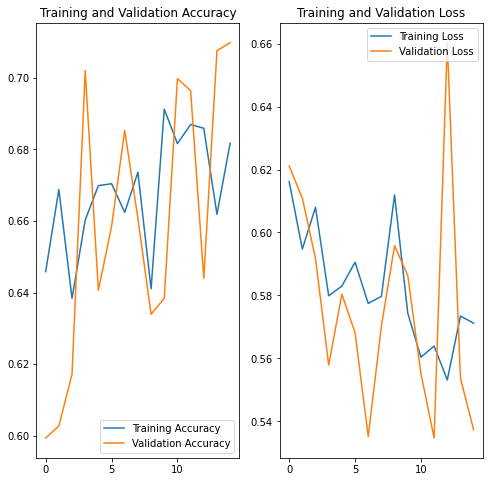

In [68]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
